# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.0'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

iso_alpha_3
administrative_area_level
data_type
url
title
year
bibtype
author
institution
textVersion

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

iso_alpha_3
administrative_area_level
data_type
url
title
year
bibtype
author
institution
textVersion

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
190334,2020-08-24,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190335,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190336,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190337,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190338,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
190334,2020-08-24,Colombia,Vichada,14,3,0,11
190335,2020-08-25,Colombia,Vichada,14,2,0,12
190336,2020-08-26,Colombia,Vichada,14,2,0,12
190337,2020-08-27,Colombia,Vichada,14,2,0,12
190338,2020-08-28,Colombia,Vichada,14,2,0,12


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
158,2020-08-24,19428,3350,352,15726
159,2020-08-25,19610,3229,354,16027
160,2020-08-26,19846,3129,356,16361
161,2020-08-27,20096,3047,356,16693
162,2020-08-28,20322,2959,358,17005


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-24,23577764,7493737,814003,15270024,0.017262,0.323823,0.050609
2020-08-25,23819912,7495720,820378,15503814,0.017220,0.325438,0.050255
2020-08-26,24086378,7537070,826411,15722897,0.017155,0.326386,0.049936
2020-08-27,24348710,7604484,831932,15912294,0.017084,0.326758,0.049685
2020-08-28,24349627,7603932,831954,15913741,0.017084,0.326776,0.049682


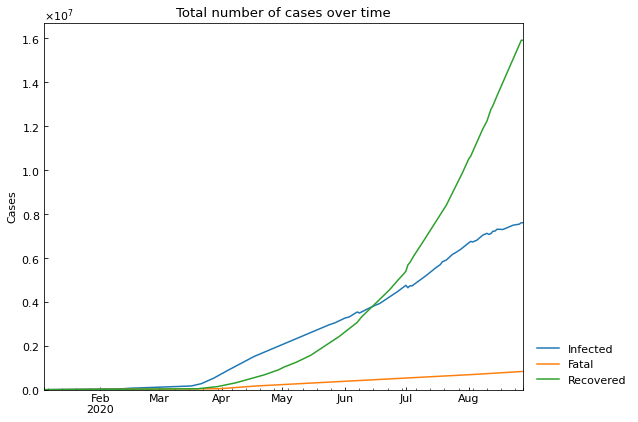

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
197,2020-08-24,63202,12692,1202,49308
198,2020-08-25,63919,12290,1216,50413
199,2020-08-26,64821,11919,1229,51673
200,2020-08-27,65685,11639,1240,52806
201,2020-08-28,66562,11326,1260,53976


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
195,2020-08-24,62507,11986,1181,49340
196,2020-08-25,63121,11494,1196,50431
197,2020-08-26,63822,10925,1209,51688
198,2020-08-27,64668,10619,1226,52823
199,2020-08-28,65573,10340,1238,53995


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
190334,2020-08-24,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190335,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190336,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190337,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190338,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
186702,COL,Colombia,Vichada,2020-08-24,107808
186703,COL,Colombia,Vichada,2020-08-25,107808
186704,COL,Colombia,Vichada,2020-08-26,107808
186705,COL,Colombia,Vichada,2020-08-27,107808
186706,COL,Colombia,Vichada,2020-08-28,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
190334,2020-08-24,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190335,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190336,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190337,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
190338,2020-08-28,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
190334,2020-08-24,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
190335,2020-08-25,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
190336,2020-08-26,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
190337,2020-08-27,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
190338,2020-08-28,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
233,2020-08-24,1,1,1,0,0,1,1,3,2,2,1,30.56
234,2020-08-25,1,1,1,0,0,1,1,3,2,2,1,30.56
235,2020-08-26,1,1,1,0,0,1,1,3,2,2,1,30.56
236,2020-08-27,1,1,1,0,0,1,1,3,2,2,1,30.56
237,2020-08-28,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
233,2020-08-24,1,1,1,0,0,1,1,3,2,2,1,30.56
234,2020-08-25,1,1,1,0,0,1,1,3,2,2,1,30.56
235,2020-08-26,1,1,1,0,0,1,1,3,2,2,1,30.56
236,2020-08-27,1,1,1,0,0,1,1,3,2,2,1,30.56
237,2020-08-28,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

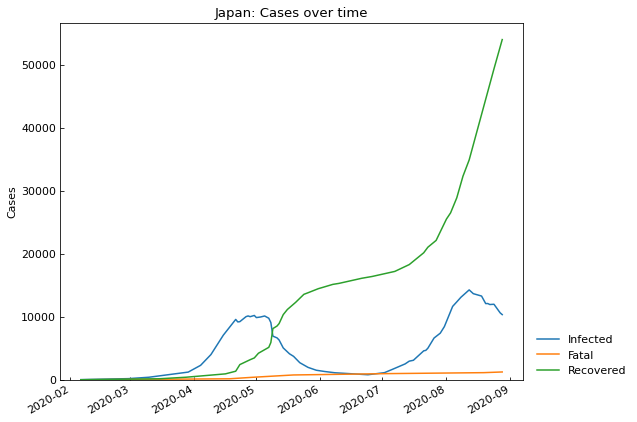

,Date,Confirmed,Infected,Fatal,Recovered
195,2020-08-24,62507,11986,1181,49340
196,2020-08-25,63121,11494,1196,50431
197,2020-08-26,63822,10925,1209,51688
198,2020-08-27,64668,10619,1226,52823
199,2020-08-28,65573,10340,1238,53995


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

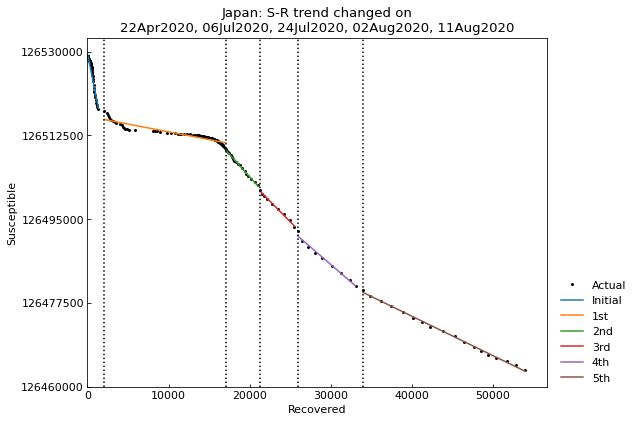

,Type,Start,End,Population
1st,Past,22Apr2020,05Jul2020,126529100
2nd,Past,06Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,10Aug2020,126529100
5th,Past,11Aug2020,28Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	5th phase (11Aug2020 - 28Aug2020): finished 1463 trials in 1 min  0 sec

	2nd phase (06Jul2020 - 23Jul2020): finished  316 trials in 0 min 10 sec

	4th phase (02Aug2020 - 10Aug2020): finished  561 trials in 0 min 15 sec

	3rd phase (24Jul2020 - 01Aug2020): finished 1678 trials in 0 min 50 sec

	1st phase (22Apr2020 - 05Jul2020): finished 1888 trials in 1 min  0 sec

Completed optimization. Total: 2 min  1 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/gamma [day],1/alpha2 [day],1/beta [day],RMSLE,Trials,Runtime
1st,Past,22Apr2020,05Jul2020,126529100,SIR-F,0.38,0.109697,0.000072,0.028651,0.066379,1440,0.110,15,13911,34,0.853563,1888,1 min 0 sec
2nd,Past,06Jul2020,23Jul2020,126529100,SIR-F,1.94,0.000123,0.000158,0.132040,0.067730,1440,0.000,14,6318,7,0.034404,316,0 min 10 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.86,0.000122,0.000232,0.132190,0.070938,1440,0.000,14,4310,7,0.018817,1678,0 min 50 sec
4th,Past,02Aug2020,10Aug2020,126529100,SIR-F,1.62,0.001008,0.000216,0.113333,0.069476,1440,0.001,14,4631,8,0.038463,561,0 min 15 sec
5th,Past,11Aug2020,28Aug2020,126529100,SIR-F,0.85,0.000884,0.000769,0.082598,0.095858,1440,0.001,10,1300,12,0.032187,1463,1 min 0 sec


### Accuracy of estimation

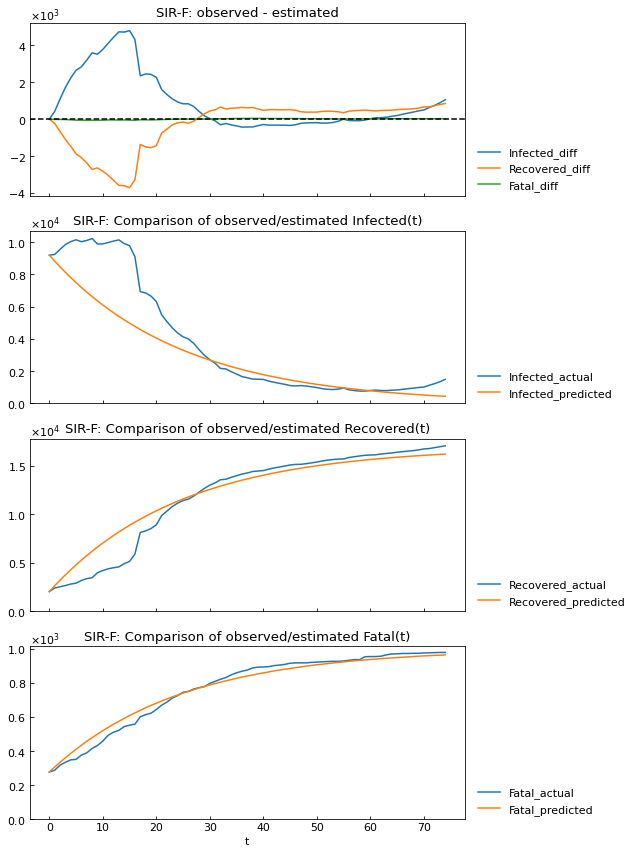

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.62

### Show parameter history

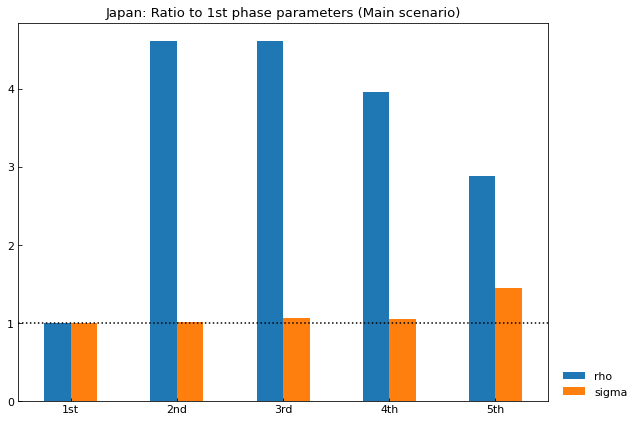

,1st,2nd,3rd,4th,5th
rho,1.0,4.608544,4.613780,3.955615,2.882879
sigma,1.0,1.020362,1.068683,1.046657,1.444112


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

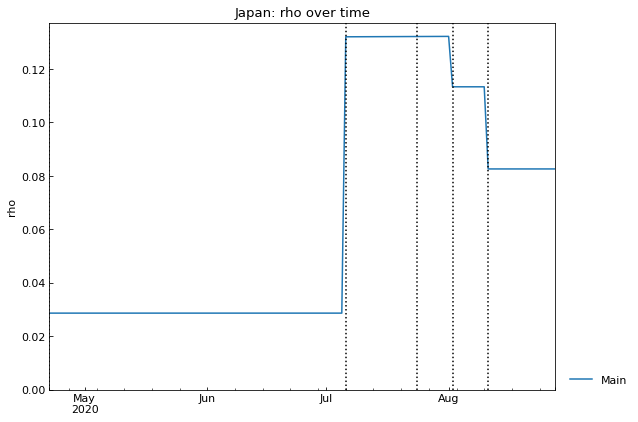

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

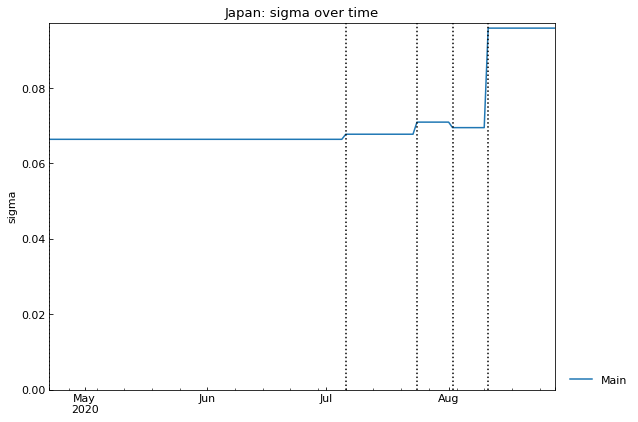

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

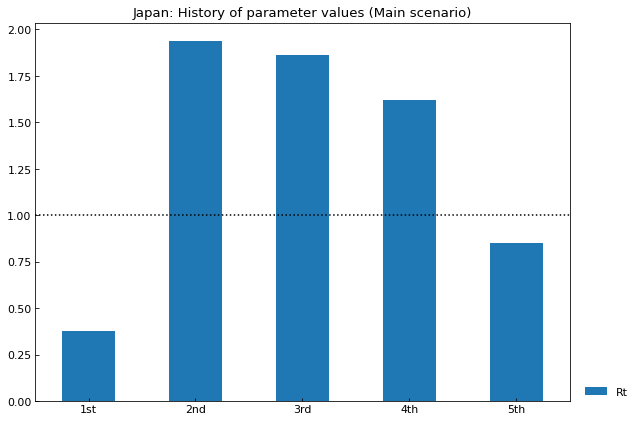

,1st,2nd,3rd,4th,5th
Rt,0.38,1.94,1.86,1.62,0.85


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

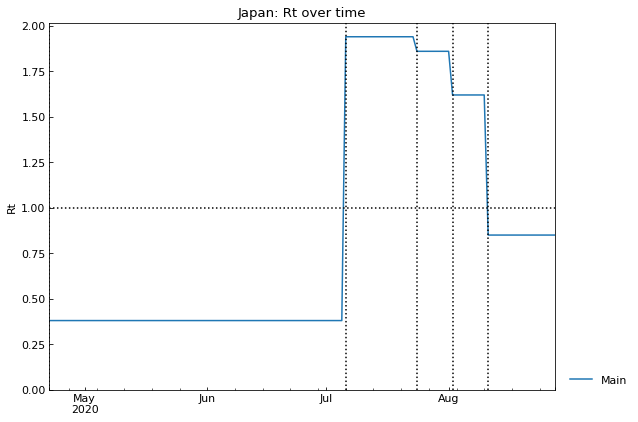

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

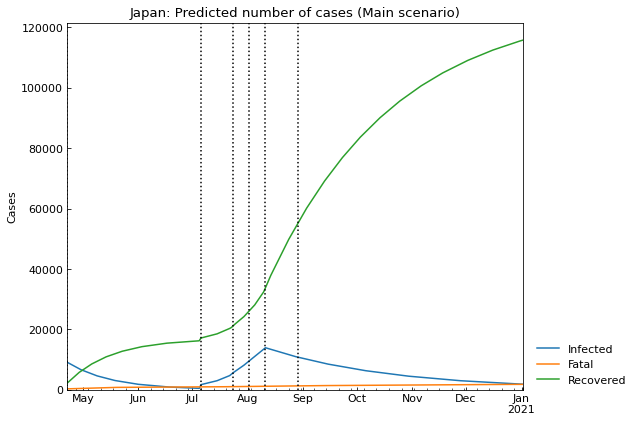

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,118810,1765,1916,115129
252,2020-12-30,118966,1766,1889,115311
253,2020-12-31,119121,1768,1862,115491
254,2021-01-01,119273,1769,1836,115668
255,2021-01-02,119424,1771,1810,115843


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.09585805584107121

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.19171611168214242

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  22Apr2020  05Jul2020   126529100  SIR-F  0.38   
         2nd      Past  06Jul2020  23Jul2020   126529100  SIR-F  1.94   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.86   
         4th      Past  02Aug2020  10Aug2020   126529100  SIR-F  1.62   
         5th      Past  11Aug2020  28Aug2020   126529100  SIR-F  0.85   
         6th    Future  29Aug2020  01Jan2021   126529100  SIR-F  0.85   
Medicine 1st      Past  22Apr2020  05Jul2020   126529100  SIR-F  0.38   
         2nd      Past  06Jul2020  23Jul2020   126529100  SIR-F  1.94   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.86   
         4th      Past  02Aug2020  10Aug2020   126529100  SIR-F  1.62   
         5th      Past  11Aug2020  28Aug2020   126529100  SIR-F  0.85   
         6th    Future  29Aug2020  28Sep2020   126529100  SIR-F  0.85   
         7th    Future  29Sep2020  01Jan2021   126529100  SIR-F  0.43   

                   theta     kappa       rho     sigma   tau  alpha1 [-]  \
Scenario Phase                                                             
Main     1st    0.109697  0.000072  0.028651  0.066379  1440       0.110   
         2nd    0.000123  0.000158  0.132040  0.067730  1440       0.000   
         3rd    0.000122  0.000232  0.132190  0.070938  1440       0.000   
         4th    0.001008  0.000216  0.113333  0.069476  1440       0.001   
         5th    0.000884  0.000769  0.082598  0.095858  1440       0.001   
         6th    0.000884  0.000769  0.082598  0.095858  1440       0.001   
Medicine 1st    0.109697  0.000072  0.028651  0.066379  1440       0.110   
         2nd    0.000123  0.000158  0.132040  0.067730  1440       0.000   
         3rd    0.000122  0.000232  0.132190  0.070938  1440       0.000   
         4th    0.001008  0.000216  0.113333  0.069476  1440       0.001   
         5th    0.000884  0.000769  0.082598  0.095858  1440       0.001   
         6th    0.000884  0.000769  0.082598  0.095858  1440       0.001   
         7th    0.000884  0.000769  0.082598  0.191716  1440       0.001   

                1/gamma [day]  1/alpha2 [day]  1/beta [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     1st               15           13911            34   0.853563   1888   
         2nd               14            6318             7  0.0344044    316   
         3rd               14            4310             7  0.0188169   1678   
         4th               14            4631             8  0.0384634    561   
         5th               10            1300            12  0.0321873   1463   
         6th               10            1300            12          -      -   
Medicine 1st               15           13911            34   0.853563   1888   
         2nd               14            6318             7  0.0344044    316   
         3rd               14            4310             7  0.0188169   1678   
         4th               14            4631             8  0.0384634    561   
         5th               10            1300            12  0.0321873   1463   
         6th               10            1300            12          -      -   
         7th                5            1300            12          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd    0 min 10 sec  
         3rd    0 min 50 sec  
         4th    0 min 15 sec  
         5th    1 min  0 sec  
         6th               -  
Medicine 1st    1 min  0 sec  
         2nd    0 min 10 sec  
         3rd    0 min 50 sec  
         4th    0 min 15 sec  
         5th    1 min  0 sec  
         6th               -  
         7th               -

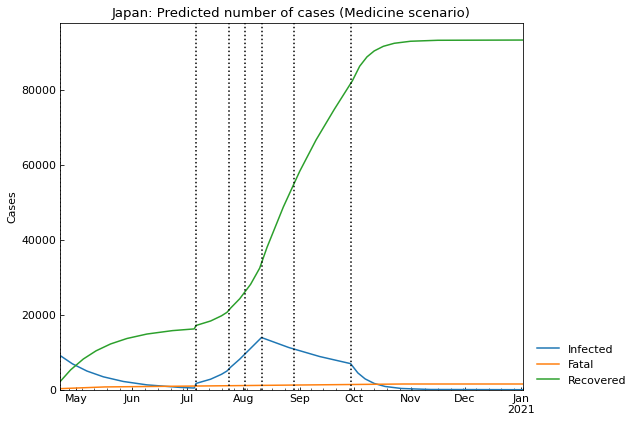

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,94703,1519,0,93184
252,2020-12-30,94704,1519,0,93185
253,2020-12-31,94704,1519,0,93185
254,2021-01-01,94704,1519,0,93185
255,2021-01-02,94704,1519,0,93185


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,7th_Rt
Main,13901,11Aug2020,1810,1771,-
Medicine,13901,11Aug2020,0,1519,0.43


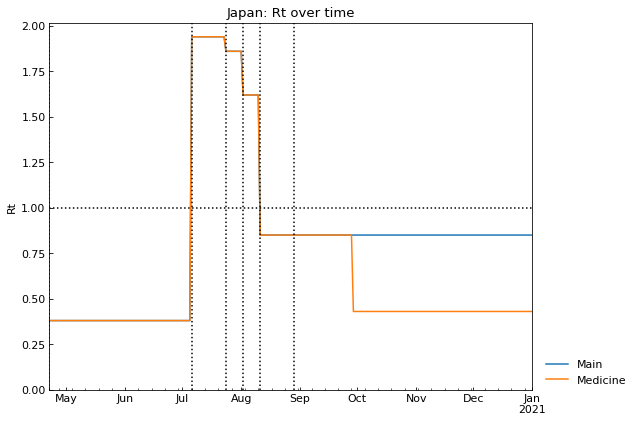

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

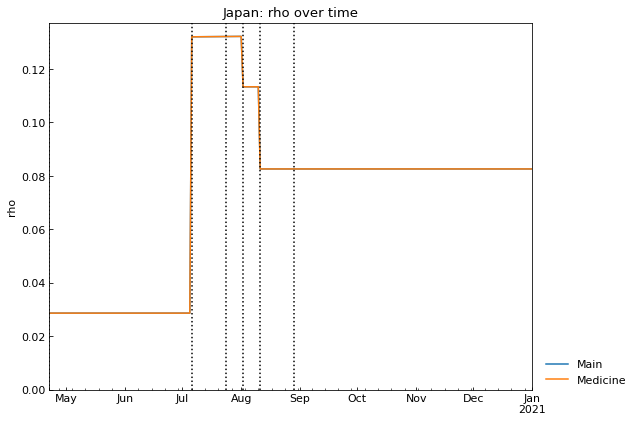

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

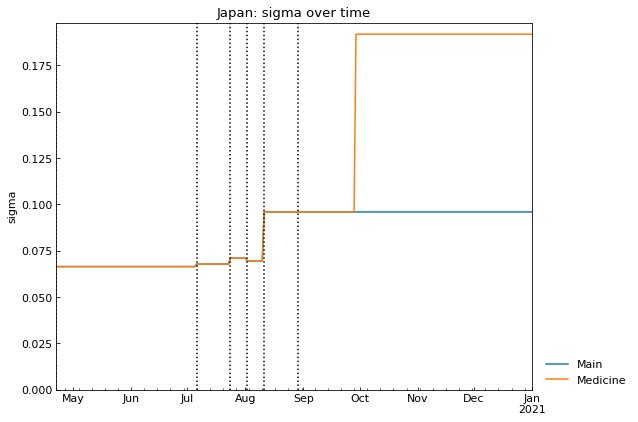

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

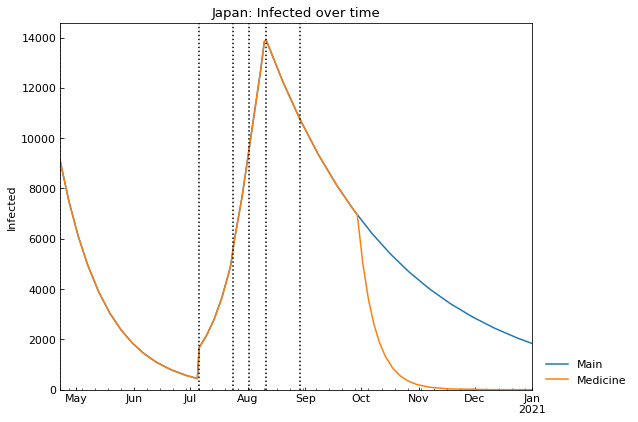

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")